<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina' 

# 2.데이터베이스 연결

- 다양한 데이터베이스 관리 시스템(DBMS)가 있지만 MS SQL Server 연결을 예로 듭니다.

**1) 라이브러리 설치**

- 구글 코랩에서 기본으로 제공되지 않는 pymssql 라이브러리를 설치합니다.

In [2]:
# 라이브러리 설치
# !pip install pymssql

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [3]:
# 라이브러리 불러오기
import pymssql
import pandas as pd

**3) SQL Server 연결**

- 연결 관련 정보를 지정하여 SQL Server에 연결합니다.
- 관련 정보와 권한을 얻기 위해서 서버 관리자의 협조가 필요할 수 있습니다.

In [4]:
# SQL Server 연결
# mssql = pymssql.connect(host='서버 IP 주소',
#                         port='포트번호', 
#                         user='계정', 
#                         password='암호', 
#                         database='데이터베이스')

mssql = pymssql.connect(host='20.194.2.187',
                        port='4331', 
                        user='student', 
                        password='Pa$$w0rd', 
                        database='MyShop2019')



OperationalError: (20009, b'DB-Lib error message 20009, severity 9:\nUnable to connect: Adaptive Server is unavailable or does not exist (20.194.2.187)\nNet-Lib error during Unknown error (10060)\nDB-Lib error message 20009, severity 9:\nUnable to connect: Adaptive Server is unavailable or does not exist (20.194.2.187)\nNet-Lib error during Unknown error (10060)\n')

**4) 데이터 읽어오기**

- 데이터를 조회할 쿼리문을 작성합니다.(쿼리문 학습 필요)
- read_sql 함수를 사용해서 쿼리를 실행해 그 결과를 가져옵니다.
- 가져온 결과는 자동으로 데이터프레임이 됩니다.

In [10]:
# 쿼리문
sql = """
SELECT * FROM 고객 WHERE 지역='서울'
"""
# 데이터프레임 만들기(mssql과 연결해서 sql문을 읽어들여 data를 가져온다는 의미)
data = pd.read_sql(sql, con=mssql) 

# 확인
data.head()

,고객코드,고객이름,성별,전화번호,전자우편,지역,생일,가입일,포인트,등급
0,agoh,오암기,F,010-5972-8213,memoryoh@naber.com,서울,1994-04-06,2018-08-23,10800,BEST
1,bballhan,한야구,M,010-9246-1120,baseballhan@hanmeil.com,서울,1980-08-19,2019-10-15,0,HELLO
2,bikim,김반지,F,010-6423-9450,banjikim@naber.com,서울,1972-03-06,2019-05-04,0,HELLO
3,bjlee2,이반장,F,010-9508-8779,banjanglee2@dbnuri.com,서울,1981-12-29,2019-04-27,0,HELLO
4,btlee,이발탄,M,010-8819-1022,baltanlee@hotmeil.com,서울,1980-03-08,2018-07-31,19200,BEST


**5) SQL Server 연결 닫기**

- 더 이상 사용할 필요가 없는 경우 연결을 닫습니다.

In [11]:
# 연결 닫기
pymssql.Connection.close(mssql)

# 3.데이터 탐색

**1) 데이터 읽어오기**

- 분석 대상 데이터를 읽어옵니다.

In [21]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/tips.csv'
tips = pd.read_csv(path)

# 확인
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# 애플 주식데이터 읽어오기 
path = 'https://bit.ly/StocksFile'
stock = pd.read_csv(path)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.858137,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.762789,460734400


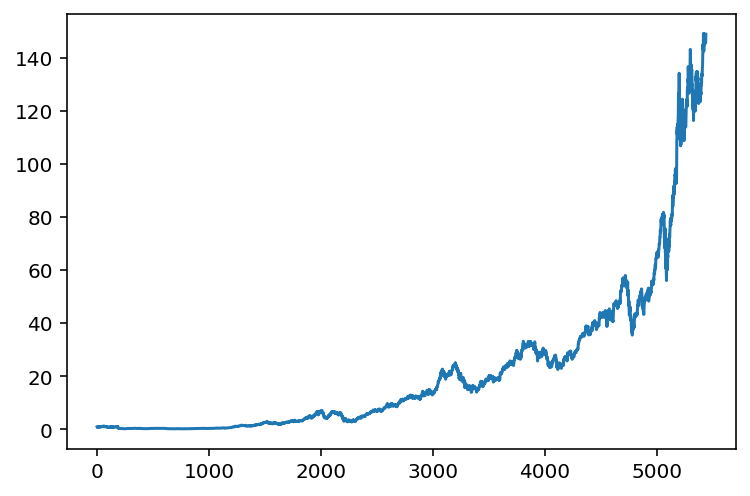

In [14]:
# 종가 확인
plt.plot(stock['Close'])
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Count'>

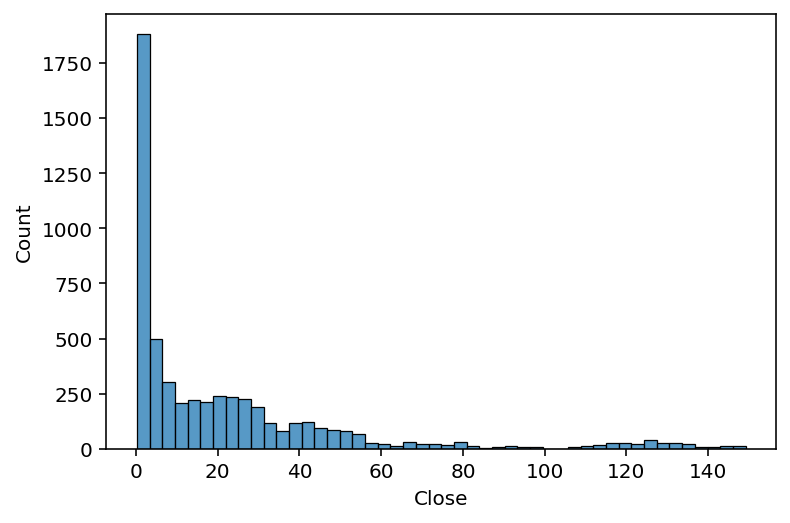

In [26]:
sns.histplot(stock['Close'])

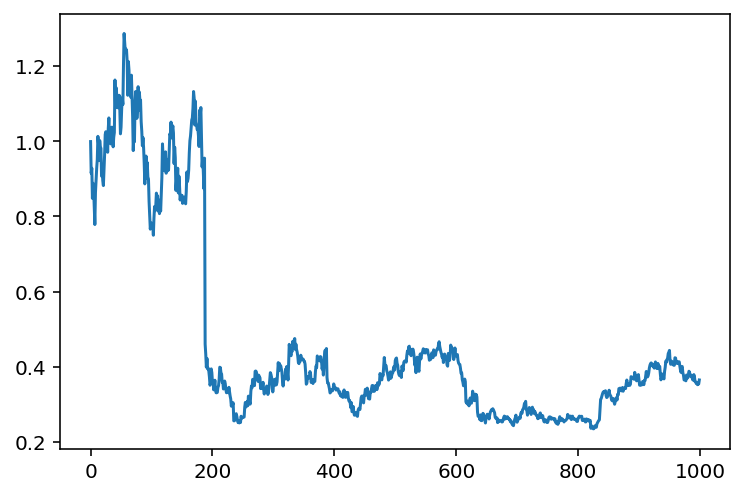

In [18]:
# 일부 구간을 보고싶을때 slice
plt.plot(stock['Close'][:1000])
plt.show()

**2) 열 정보 확인**

- 열 이름, 데이터 형식 등을 확인합니다.

In [22]:
# 열 정보 확인
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


**3) 기초 통계 정보 확인**

- 개수, 평균, 최솟값, 최댓값, 표준편차, 사분위 값을 확인합니다.

In [24]:
# 기초통계정보 확인
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


**4) 범주값 확인**

- 범주형 열에 대한 범주값 개수를 확인합니다.

In [31]:
# sex 확인
tips['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
# smoker 확인
tips['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
# time 확인
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [35]:
# day 확인
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

**5) 결측치 확인**

- 결측치 존재 여부를 확인합니다.

In [36]:
# NaN 값 확인
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

**6) 상관관계 확인**

- 열 간의 상관관계를 확인합니다.

In [37]:
# 상관관계 확인
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [41]:
#  상관관계 시각화



# 4.데이터 시각화

**1) 막대 그래프**

- 막대 그래프는 범주값 간의 비교 시 사용하면좋습니다.

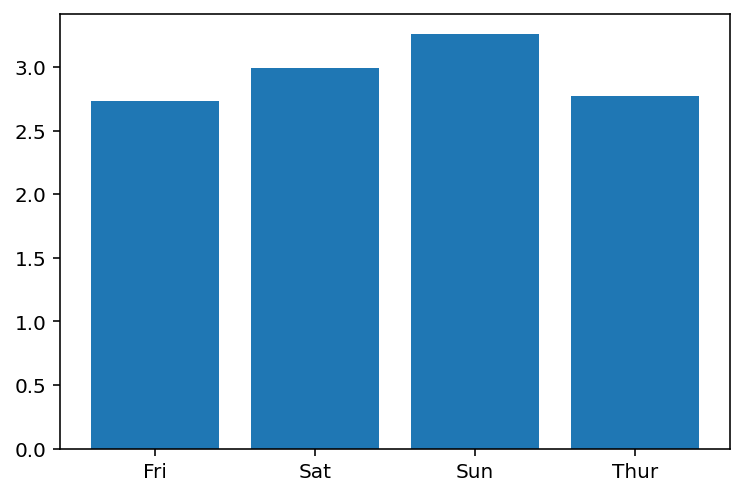

In [29]:
# 막대그래프 #1
tmp = tips.groupby(by='day', as_index=False)[['tip']].mean()
plt.bar(tmp['day'], tmp['tip'])
plt.show()

**2) 히스토그램**

- 히스토그램은 값 분포 확인 시 사용하면 좋습니다.

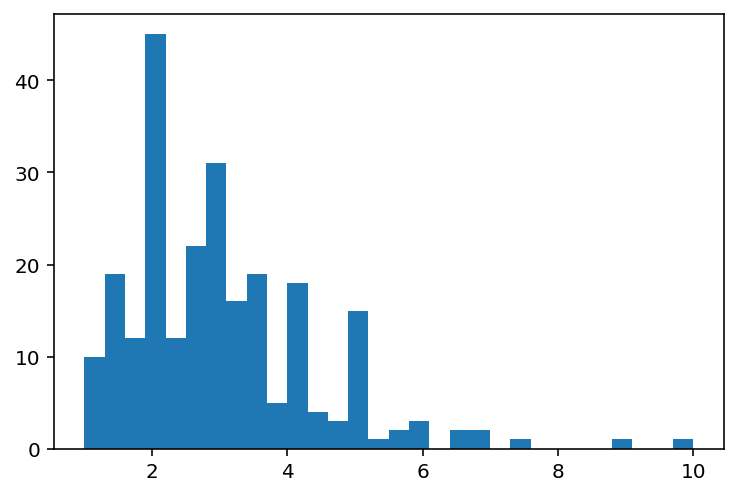

In [42]:
# 히스토그램
plt.hist(tips['tip'], bins=30)
plt.show()

**3) 박스 그래프**

- 박스 그래프는 값 분포 확인 시 사용하면 좋습니다.

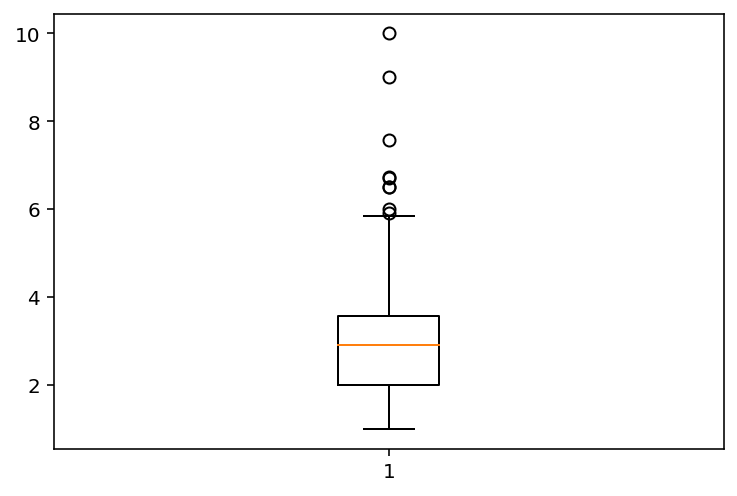

In [43]:
# 박스 그래프
plt.boxplot(tips['tip'])
plt.show()

[2. 1.]
[3.5625 5.85  ]


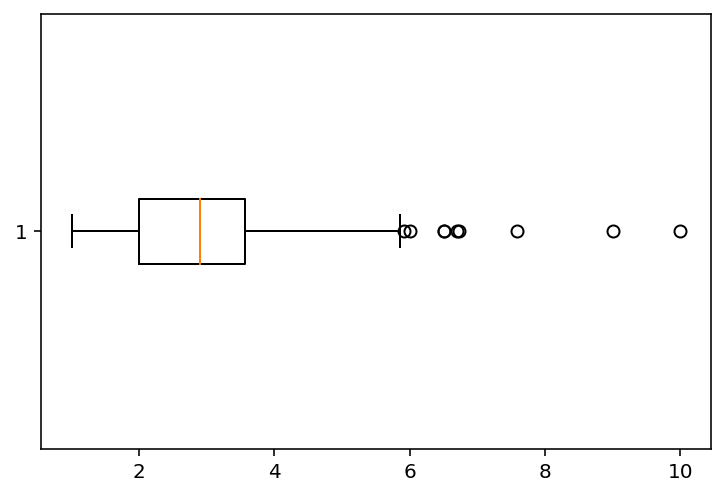

In [48]:
# 수염값 뽑아내기
a = plt.boxplot(tips['tip'],vert=False)
print(a['whiskers'][0].get_xdata())
print(a['whiskers'][1].get_xdata())

**4) 산점도**

- 산점도는 (수치-수치)상관관계 확인 시 사용하면 좋습니다.

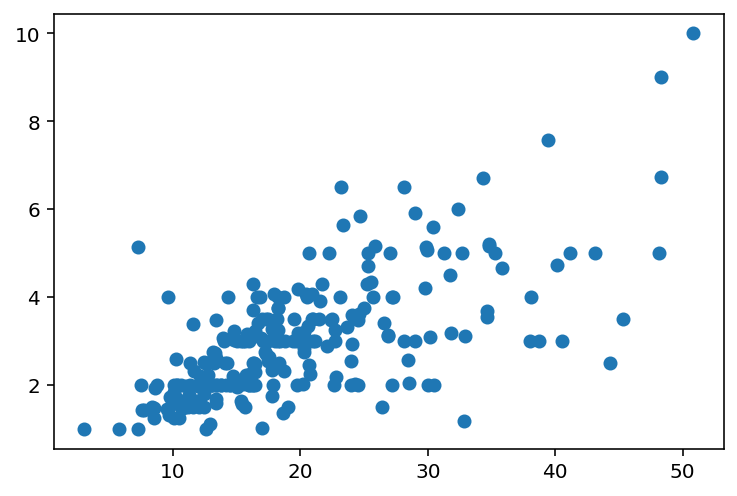

In [44]:
# 산점도
plt.scatter(tips['total_bill'], tips['tip'])
plt.show()

**5) 선 그래프**

- 선 그래프는 값 변경 추이 확인 시 사용하면 좋습니다.(시계열데이터의경우)

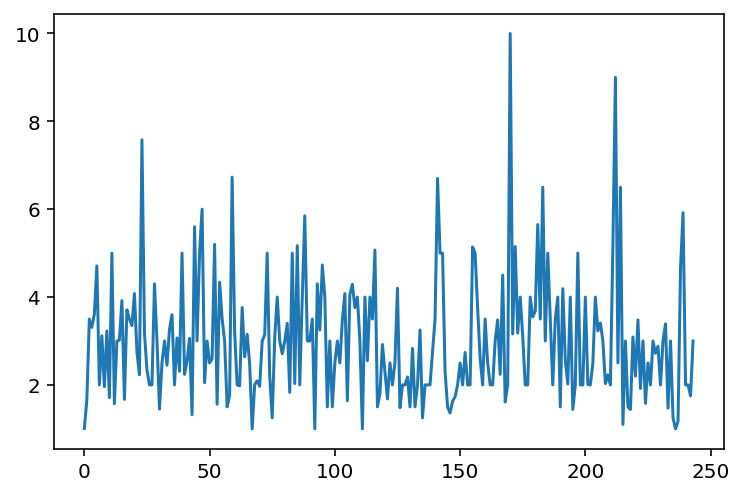

In [45]:
# 선 그래프
plt.plot(tips['tip'])
plt.show()

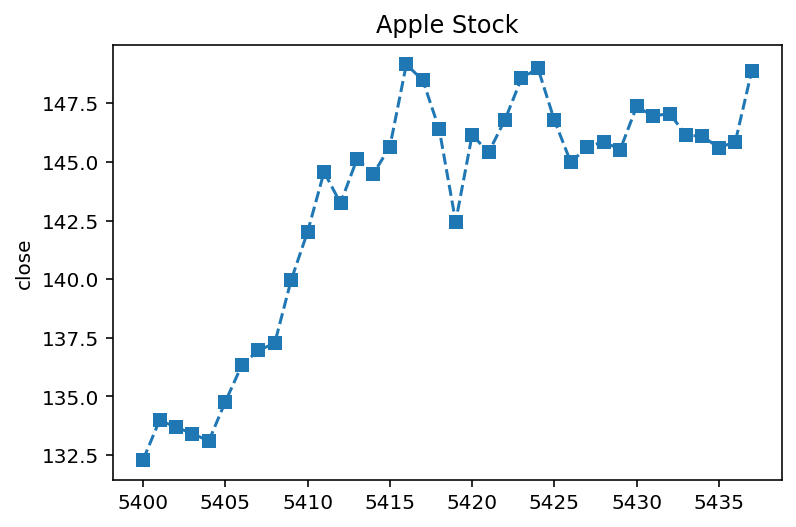

In [54]:
# 선 그래프
plt.plot(stock['Close'][5400:],marker='s',linestyle='--')
plt.title('Apple Stock')
plt.ylabel('close')
plt.show()

# 5.데이터 변경 및 요약

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 데이터 읽어오기**

- 분석 대상 데이터를 읽어옵니다.

In [98]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv'
titanic = pd.read_csv(path)

# 상위 몇 개 행 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**2) Title 열 추가**

- 호칭을 갖는 Title 열을 추가합니다.

In [100]:
# 호칭 추출 (정규표현식 사용)
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.', expand=False) # a-z까지 문자가 온후 .이 붙는 단어들 추출

# 확인
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Don           1
Lady          1
Capt          1
Ms            1
Jonkheer      1
Countess      1
Sir           1
Name: Title, dtype: int64

In [101]:
# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
titanic.loc[titanic['Title'].isin(main_tit_list)==False,'Title'] = 'Others'

# 확인
titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Others     67
Name: Title, dtype: int64

**3) 결측치 처리**

- 결측치를 적절한 값으로 채웁니다.

In [102]:
# 결측치 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [103]:
titanic.groupby(by='Title')['Age'].median()

Title
Miss      21.0
Mr        30.0
Mrs       35.0
Others     9.0
Name: Age, dtype: float64

In [106]:
# Age 결측치를 Title 별 중앙값으로 채우기
# Age 칼럼과 가장 상관관계가 높은 칼럼으로 채우는식은 어떨까? 
titanic['Age'].fillna(titanic.groupby('Title')['Age'].median(), inplace=True)

# Embarked 최빈값으로 채우기


# 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

**4) AgeGroup 열 추가**

- 나이를 그룹핑한 AgeGroup 열을 추가합니다.

In [108]:
# AgeGroup 추가
titanic['AgeGroup'] = pd.cut(titanic['Age'], 
                             bins=[0, 16, 25, 35, 60, 100], 
                             labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

# 확인
titanic['AgeGroup'].value_counts()

26_35     332
17_25     237
36_60     195
0_16      105
61_100     22
Name: AgeGroup, dtype: int64

**5) Family 열 추가**

- 가족 수를 갖는 Family 열을 추가합니다.

In [110]:
# Family 추가
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

# 확인
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,17_25,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,36_60,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26_35,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,26_35,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,26_35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Others,26_35,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,17_25,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,17_25,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,26_35,0


**6) Alone 열 추가**

- 혼자 탑승했는 지 여부를 갖는 Alone 열을 추가합니다.

In [113]:
# Single 추가
titanic['Alone'] = 'No'
titanic.loc[titanic['Family']==0,'Alone'] = 'Yes'


# 확인
titanic['Alone']

0       No
1       No
2      Yes
3       No
4      Yes
      ... 
886    Yes
887    Yes
888     No
889    Yes
890    Yes
Name: Alone, Length: 891, dtype: object

**7) 불필요한 열 제거**

- 불필요한 열을 제거합니다.

In [114]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
titanic.drop(drop_cols,axis=1,inplace=True)

# 확인
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Family,Alone
0,0,3,male,1,0,7.2500,S,Mr,17_25,1,No
1,1,1,female,1,0,71.2833,C,Mrs,36_60,1,No
2,1,3,female,0,0,7.9250,S,Miss,26_35,0,Yes
3,1,1,female,1,0,53.1000,S,Mrs,26_35,1,No
4,0,3,male,0,0,8.0500,S,Mr,26_35,0,Yes


# 6.이상치 제거

- 주어진 데이터 분포 중심에서 심하게 멀리 떨어진 데이터를 이상치라고 합니다.
- 즉, 정상 데이터라기 보다는 비정상 데이터라고 할 수 있습니다.
- 이상치는 제대로 된 데이터 분석을 방해할 수 있으므로 적절히 처리해야 합니다.

**1) 데이터 읽어오기**

- 분석 대상 데이터를 읽어옵니다.

In [115]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 상위 몇 개 행 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [ ]:
# 선형보간법으로 채우기



# 확인


**2) 이상치 확인**

- 박스 플롯을 사용하면 가장 쉽게 이상치 존재 여부를 알 수 있습니다.
- Wind 열 데이터 분포를 확인합니다.

In [ ]:
# 박스 플롯으로 확인
plt.boxplot(air['Wind'], vert=0)
plt.yticks([1], ['Wind'])
plt.show()

**박스플롯**

<img src='https://raw.githubusercontent.com/jangrae/img/master/boxplot02.png' align = "left" width=500/>

- describe() 메소드 결과의 25%, 75% 값을 사용해 이상치를 구분할 수 있습니다.

In [116]:
# 이상치 경계 찾기
q1 = air.describe().loc['25%', 'Wind']
q3 = air.describe().loc['75%', 'Wind']
iqr = q3 - q1
l_bound = 
u_bound = 

# 확인
print('이상치 하한 경계:', l_bound)
print('이상치 상한 경계:', u_bound)

SyntaxError: invalid syntax (<ipython-input-116-dd82b1b61169>, line 5)

- 앞에서 확인한 박스 플롯에 이상치 경계를 시각화하면 이해하기 쉽습니다.

In [ ]:
# 이상치 경계 시각화
plt.boxplot(air['Wind'], vert=0)
plt.yticks([1], ['Wind'])
plt.axvline(l_bound, color='r', linestyle='--')
plt.axvline(u_bound, color='r', linestyle='--')
plt.show()

- 이상치 하한 경계값보다 작은 행, 상한 경계값 보다 큰 행을 조회하면 이상치 데이터를 확인할 수 있습니다.

In [ ]:
# 이상치 조건
cond01 = air['Wind'] < l_bound
cond02 = air['Wind'] > u_bound

# 결과 확인
air[ ? ]

**3) 이상치 행 제거**

- 필요에 따라 이상치가 있는 행을 제거할 수 있습니다.

In [ ]:
# 이상치 조건
cond01 = air['Wind'] < l_bound
cond02 = air['Wind'] > u_bound

# 이상치 인덱스 확인
outlier = air[cond01 | cond02].index

# 이상치 행 제거
air_test = air.drop(outlier, axis=?)

In [ ]:
# 처리 후(air_test)
plt.boxplot(air_test['Wind'], vert=0)
plt.yticks([1], ['Wind'])
plt.show()

**4) 이상치 값 변경**

- 필요에 따라 이상치를 다른 값으로 변경할 수 있습니다.
- 예를 들어 이상치를 판단하는 경계값으로 변경할 수 있습니다.

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# 처리 후(air_test)
plt.boxplot(air_test['Wind'], vert=0)
plt.yticks([1], ['Wind'])
plt.show()

In [ ]:
# 이상치 경계 찾기
q1 = air.describe().loc['25%', 'Wind']
q3 = air.describe().loc['75%', 'Wind']
iqr = q3 - q1
l_bound = q1 - iqr * 1.5
u_bound = q3 + iqr * 1.5

# 이상치 조건
cond01 = air_test['Wind'] < l_bound
cond02 = air_test['Wind'] > u_bound

# 이상치 값 변경



In [ ]:
# 처리 후(air_test)
plt.boxplot(air_test['Wind'], vert=0)
plt.yticks([1], ['Wind'])
plt.show()